In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('telecom_churn.csv')

data['International plan'] = pd.factorize(data['International plan'])[0]
data['Voice mail plan'] = pd.factorize(data['Voice mail plan'])[0]
data['Churn'] = data['Churn'].astype('int')
y = data['Churn']
data.drop(['State', 'Area code' ,'Churn'], axis=1, inplace=True)

data.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [2]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = train_test_split(data.values, y, test_size=0.3,random_state=2018)

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_holdout)

print(accuracy_score(y_holdout, knn_pred)) #preciznost predikcije na test setu

0.88


In [3]:
knn_pred1 = knn.predict(X_train)
print(accuracy_score(y_train, knn_pred1)) #preciznost predikcije na trening setu

0.887269609944


In [4]:
#ocekivano je da je preciznost predikcije bolja na trening setu, jer se upravo nad tim podacima trenira model;
#moze se desiti da rezultati budu znatno losiji na test setu, ukoliko taj test set sadrzi neke nove paterne koji nisu bili prisutni u trening setu

In [5]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(data.values, y, test_size=0.3,random_state=2018)

tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2,random_state=2018)

tree.fit(X_train, y_train)

tree_pred = tree.predict(X_holdout)

print(accuracy_score(y_holdout, tree_pred))

0.935


In [6]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(data.values, y, test_size=0.3,random_state=2018)

rf= RandomForestClassifier(n_estimators=1000)

rf.fit(X_train, y_train)

rf_pred= rf.predict(X_holdout)

print(accuracy_score(y_holdout, rf_pred))

0.955


In [7]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

gb.fit(X_train, y_train)

gb_pred= gb.predict(X_holdout)

print(accuracy_score(y_holdout, gb_pred))

0.882


In [8]:
values = [accuracy_score(y_train, knn_pred1), accuracy_score(y_holdout, tree_pred),accuracy_score(y_holdout, rf_pred),accuracy_score(y_holdout, gb_pred)]
index = ['KNN', 'DT', 'RF', 'GBM']
columns = ['Accuracy on test set']
comparing = pd.DataFrame(index=index, columns=columns)
comparing['Accuracy on test set'] = values
comparing

,Accuracy on test set
KNN,0.88727
DT,0.93500
RF,0.95500
GBM,0.88200


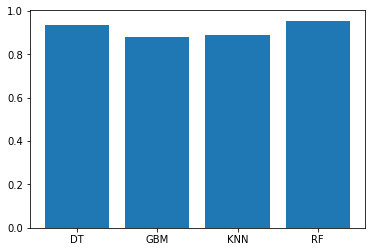

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar

plt.bar(index, values, align='center')
plt.show()

[ 0.86324786  0.89316239  0.85897436  0.87553648  0.87124464  0.8583691
  0.87124464  0.86695279  0.88841202  0.87982833]
The optimal number of neighbors is 12 with 87.4%


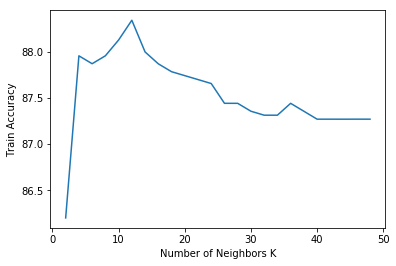

In [20]:
#TRYING DIFFERENT K IN KNN

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


#Neighbors
neighbors = list(filter(lambda x: x % 2 == 0, list(range(1,50))))
 
#Create empty list that will hold cv scores
cv_scores = []
 
#Perform 10-fold cross validation on training set for odd values of k:
seed=123
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value)
    kfold = StratifiedKFold(n_splits=10, random_state=seed)
    scores = cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    #print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))
 
print(scores)
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))
 
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

[ 0.95299145  0.93589744  0.92735043  0.93133047  0.93133047  0.91845494
  0.94420601  0.9527897   0.93562232  0.92274678]
The optimal number of min_sample_leaf is 3 with 93.6%


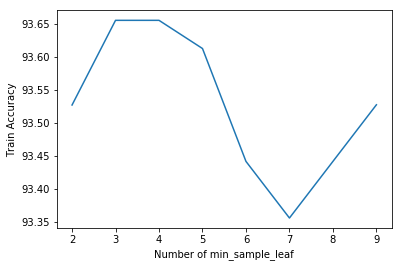

In [21]:
#TRYING DIFFERENT min_samples_leaf IN DT

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Leaves
leaves = list((range(2,10)))
 
#Create empty list that will hold cv scores
cv_scores = []
 
#Perform 10-fold cross validation on training set for odd values of l:
seed=123
for l in leaves:
    l_value = l+1
    tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=l_value,random_state=2018)
    kfold = StratifiedKFold(n_splits=10, random_state=seed)
    scores = cross_val_score(tree, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    #print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))
 
print(scores)
optimal_l = leaves[cv_scores.index(max(cv_scores))]
print ("The optimal number of min_sample_leaf is %d with %0.1f%%" % (optimal_l, cv_scores[optimal_l]))
 
plt.plot(leaves, cv_scores)
plt.xlabel('Number of min_sample_leaf')
plt.ylabel('Train Accuracy')
plt.show()

In [22]:
##LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=1, random_state=17)

logit.fit(X_train, y_train)

log_pred = logit.predict(X_holdout)

print(logit.score(X_holdout, y_holdout)) #preciznost predikcije na test setu

0.852


In [23]:
coefs = logit.coef_[0]
print(coefs) #koeficijenti logisticke regresije

[ -3.38043955e-04   1.96885874e+00  -3.47433524e-01  -4.06384969e-02
   7.86324245e-03   4.40478023e-04   1.49873509e-02   5.39492707e-03
  -7.15827711e-03  -4.87856792e-03   1.40771264e-03  -1.71201515e-03
   7.75051246e-03   5.78947160e-02  -1.30127896e-01   4.46278978e-02
   4.66461239e-01]


In [24]:
columns_data = data.columns
coef_df = pd.DataFrame(columns=columns_data)
coef_df.loc[0] = coefs
coef_df= coef_df.iloc[:, 0:].eq(1).sum().rename_axis('Feature').reset_index(name='Coef')
#coef_df

In [25]:
coef_df['Coef'] = coefs
coef_df = coef_df.sort_values('Coef')


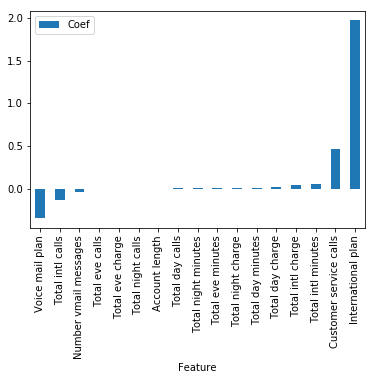

In [26]:
%matplotlib inline

coef_df.plot.bar(x='Feature', y='Coef',rot=90)